# sqlalchemy-challenge M. Wright
SQLAlchemy Homework - Surfs Up!

## Step 1 - Climate Analysis and Exploration Assignment 
 
 The ReadMe file and the startercode had some differences so I'm including below the step by step instructions as listed in the Read me File. 
 
Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.
 
Using Python and SQLAlchemy to do basic climate analysis and data exploration of climate database. All of the following analysis will be done using SQLAlchemy ORM queries, Pandas, and Matplotlib.  Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration. 


1. Use SQLAlchemy create_engine to connect to your sqlite database.
2. Use SQLAlchemy automap_base() to reflect your tables into classes and 
3. Save a reference to those classes called Station and Measurement.
 
- The vacation range is approximately 3-15 days total. 

4. Choose a start date and end date for your trip. 
-- Precipitation analysis * Retrieving the last 12 months of precipitation data.

5. Select only the date and prcp values 
6. Load the query results into a Pandas DataFrame setting the index to date
7. Sort the DataFrame values by date
8. Plot using the DataFrame plot method 

-- Calculating the total number of stations.

9. List stations and obserbation counts in descending order
10. Identify the station with the highest number of observations (Use func.min, func.max, func.avg and func.count)

Calculating the last 12 months of temperature data 

11. filter by the station with the highest number of observations 
12. plot the results using histogram using bins=12

**REQUIRED HOMEWORK NOTEBOOK MATERIAL COMPLETE **  MOE TO FLA
-- Use FLASK to create your routes. 
#use jasonify to convert API data into valid JSON response object. 
#Join the station and measurement tables for analysis. 

13. use / for Homepage - Listing all routes available 
14. use /api/v1.0/precipitation
15. convert querie results into a dictionary using date as the key and prcp as the value 
16. return the JSON representation of the dictionary. 
17. use /api/v1.0/stations
18. return a JSON list of stations from the data 
19. use /api/v1.0/tobs 
20. query for dates and temperature observations from a year from the last data point.
21. use api/v1.0/<start> and /api/v1.0/<start>/<end> 
22. return a JSON list of the min temperature, average temperature and max temperature given a start or end range *This is where you pick a vacation range from 3-15 days. 
 23. when given the start only, calculate TMIN, TAVG and TMAX for all dates greater than and equal to the start date. 
24. When given the start and end date, calculate the TMIN, TAVG, and TMAX for the start and end date inclusive. 
    

* Optional challenge queries. Recommended but not required for the homework.

##### Temperature Analysis I

 Is there a meaningful difference between the temperature in, for example, June and December?
 
##### Temperature Analysis II

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
* Plot the min, avg, and max temperature from your previous query as a bar chart

##### Daily Rainfall Average

* Calculate the rainfall per weather station using the previous year's matching dates.
* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.



In [1]:
import matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format for Measurements 
first_row = session.query(Measurement).first()
first_row.__dict__

#station = station id 
#prcp = prescipitation
#tobs = time of observation

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x161dd0f65c8>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0}

In [11]:
# Display the row's columns and data in dictionary format for Stations
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x161dd178308>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find the latest Date of Data available 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = latest_date[0]
latest_date



'2017-08-23'

In [13]:
# Calculate the date 1 year ago from the last data point in the database

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("Query Date: ", query_date)
#Results Query Date:  2016-08-23

Query Date:  2016-08-23


In [14]:
#Retrieve the last 12 months of preciptation data available. 

session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores

ytd_prcp = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23').\
        order_by(Measurement.date).all()
ytd_prcp



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

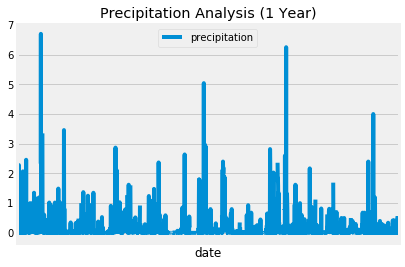

In [15]:
import pandas as pd 

# Save the query results as a Pandas DataFrame and set the index to the date column
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

df = pd.DataFrame(ytd_prcp, columns=['date', 'precipitation'])

# Set index to date 
df.set_index('date', inplace = True)

# Sort the dataframe by date
df = df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Analysis (1 Year)")
plt.legend(loc='upper center')
plt.tight_layout()
plt.xticks([])
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
# GitLab Homework Hint: (Use func.min, func.max, func.avg and func.count)
#https://stackoverflow.com/questions/40292618/getting-distinct-count-of-column-on-a-sqlalchemy-query-object

from sqlalchemy import func, distinct

#session.query(Measurement.station).distinct()
#session.query(Measurement.station).count()
#session.query(Measurement.station).count().distinct()

session.query(Measurement.station).distinct().count()



9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Identify the station with the highest number of observations (Use func.min, func.max, func.avg and func.count)


act_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result


[(54.0, 85.0, 71.66378066378067)]

![precipitation](Images/station-histogram.png)

## Optional Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
